In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
df.duplicated().sum()

146

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(53794, 10)

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [18]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [19]:
df.groupby('color')['price'].mean()

color
D    3174.441007
E    3079.608020
F    3726.749580
G    4001.352069
H    4482.855174
I    5081.751248
J    5326.415418
Name: price, dtype: float64

In [20]:
df.groupby('cut')['price'].mean()

cut
Ideal        3462.749953
Premium      4583.501891
Very Good    3981.016157
Good         3919.121039
Fair         4341.954318
Name: price, dtype: float64

In [22]:
df.groupby('carat')['price'].mean()

carat
0.20      365.166667
0.21      380.222222
0.22      391.400000
0.23      486.143345
0.24      505.185039
            ...     
4.00    15984.000000
4.01    15223.000000
4.13    17329.000000
4.50    18531.000000
5.01    18018.000000
Name: price, Length: 273, dtype: float64

In [26]:
r = df.groupby(['cut','carat'])['price'].mean()
print(r)

cut    carat
Ideal  0.20       367.000000
       0.21              NaN
       0.22              NaN
       0.23       498.181818
       0.24       555.028986
                    ...     
Fair   4.00              NaN
       4.01              NaN
       4.13     17329.000000
       4.50     18531.000000
       5.01     18018.000000
Name: price, Length: 1365, dtype: float64


In [27]:
result_df = r.reset_index()
print(result_df)


        cut  carat         price
0     Ideal   0.20    367.000000
1     Ideal   0.21           NaN
2     Ideal   0.22           NaN
3     Ideal   0.23    498.181818
4     Ideal   0.24    555.028986
...     ...    ...           ...
1360   Fair   4.00           NaN
1361   Fair   4.01           NaN
1362   Fair   4.13  17329.000000
1363   Fair   4.50  18531.000000
1364   Fair   5.01  18018.000000

[1365 rows x 3 columns]


In [29]:
a = pd.DataFrame(result_df)

In [30]:
a.isnull().sum()

cut        0
carat      0
price    267
dtype: int64

In [31]:
a.dropna()

,cut,carat,price
0,Ideal,0.20,367.000000
3,Ideal,0.23,498.181818
4,Ideal,0.24,555.028986
5,Ideal,0.25,532.575758
6,Ideal,0.26,566.377358
...,...,...,...
1355,Fair,3.40,15964.000000
1358,Fair,3.65,11668.000000
1362,Fair,4.13,17329.000000
1363,Fair,4.50,18531.000000


In [33]:
a.isnull().sum()

cut        0
carat      0
price    267
dtype: int64

In [34]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
df = df[df.x != 0]

In [46]:
(df.z == 0).value_counts()

False    53775
True        12
Name: z, dtype: int64

In [47]:
df = df[df.z != 0]

In [48]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [50]:
df.shape

(53775, 10)

In [51]:
iput = ['carat','color','clarity','depth','table','price','x','y','z']
oput = ['cut']

In [52]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder

X = df[iput].copy()
y = df[oput].copy()



In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = .20)

In [66]:
x_train = pd.get_dummies(x_train, columns=['color', 'clarity'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['color', 'clarity'], drop_first=True)

x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
le = LabelEncoder()
y_train = le.fit_transform(y_train['cut'])
y_test = le.transform(y_test['cut']) 

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43020, 20)
(10755, 20)
(43020,)
(10755,)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=123, class_weight='balanced')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7681078568107856

Classification Report:
               precision    recall  f1-score   support

        Fair       0.87      0.87      0.87       299
        Good       0.76      0.65      0.70       995
       Ideal       0.82      0.92      0.86      4258
     Premium       0.75      0.81      0.77      2812
   Very Good       0.66      0.49      0.56      2391

    accuracy                           0.77     10755
   macro avg       0.77      0.75      0.76     10755
weighted avg       0.76      0.77      0.76     10755


Confusion Matrix:
 [[ 261   27    1    9    1]
 [  31  647   16   56  245]
 [   5    6 3906  178  163]
 [   1   16  323 2269  203]
 [   1  151  528  533 1178]]


In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.7667131566713157


,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [80]:
# Add engineered feature 'volume' to both train and test
x_train['volume'] = x_train['x'] * x_train['y'] * x_train['z']
x_test['volume'] = x_test['x'] * x_test['y'] * x_test['z']

# Now train your model
clf.fit(x_train, y_train)

# Then predict
y_pred = clf.predict(x_test)


Classification Report:

              precision    recall  f1-score   support

        Fair       0.87      0.88      0.88       299
        Good       0.77      0.65      0.71       995
       Ideal       0.82      0.92      0.87      4258
     Premium       0.75      0.80      0.78      2812
   Very Good       0.67      0.51      0.58      2391

    accuracy                           0.77     10755
   macro avg       0.78      0.75      0.76     10755
weighted avg       0.76      0.77      0.76     10755



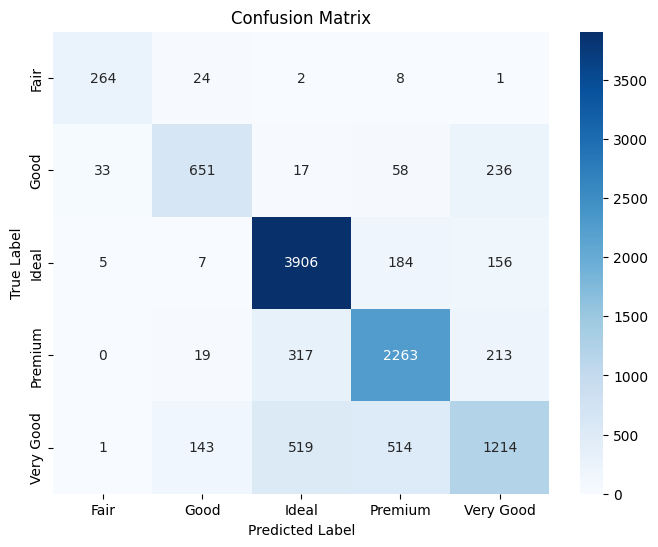

In [81]:
# Then predict
y_pred = clf.predict(x_test)

# Inverse transform y_test to original labels (if needed for readable output)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# If you used LabelEncoder
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
